# Building an end to end multi-class image classficication model using Tensor 2.0 and Tensor Hub

WorkFlow :

#1. Problem :  

Identifying a Breed of a dog through a given image 

# 2. Data 

Getting data from 

https://www.kaggle.com/c/dog-breed-identification/data

# 3. Evaluation

Evaluation will be as per kaggle.com , i.e prediction probabilities for each
dog breed.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

# 4. Features

1. Images (Unstructured data)

2. 120 type of breeds of dog

3. Around 10000 test image data for predicting there individual label

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print('version of tensorflow :',tf.__version__)
print('version of tensorflow_hub :',hub.__version__)

version of tensorflow : 2.2.0
version of tensorflow_hub : 0.8.0


In [ ]:
#checking if GPU is available on colab

print('GPU Available'if tf.config.list_physical_devices('GPU') else 'No')

GPU Available


# Getting data ready (turning into tensors)
As data needs to be in numeric form

In [ ]:
import pandas as pd

labels_csv = pd.read_csv('/content/drive/My Drive/Dog-Vision/labels.csv')

print(labels_csv.describe())

labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     5ae8cb7df401c18656960ab5053757aa  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
#How many images are present per god breed

labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

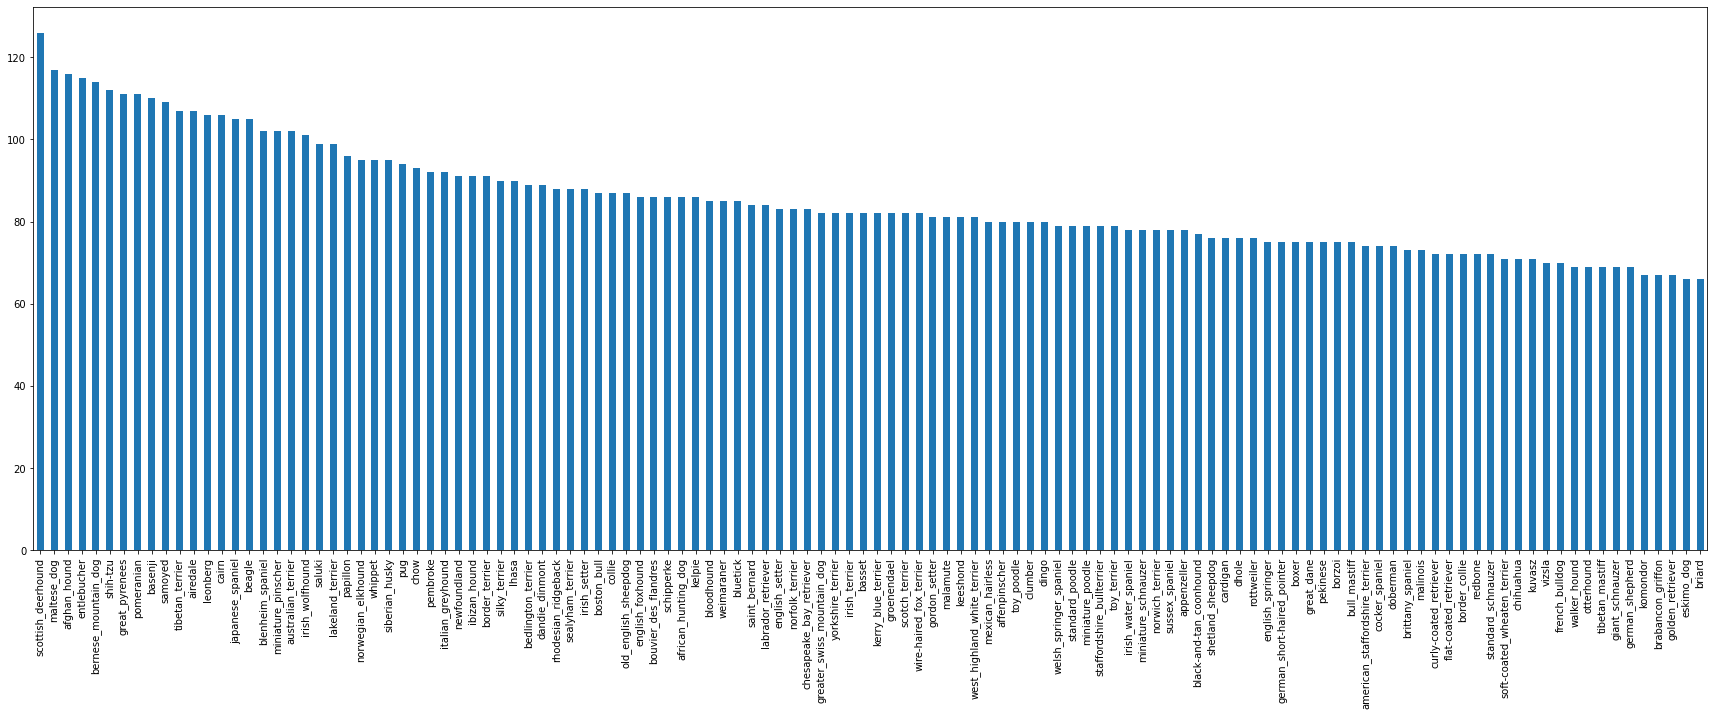

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(30,10))

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

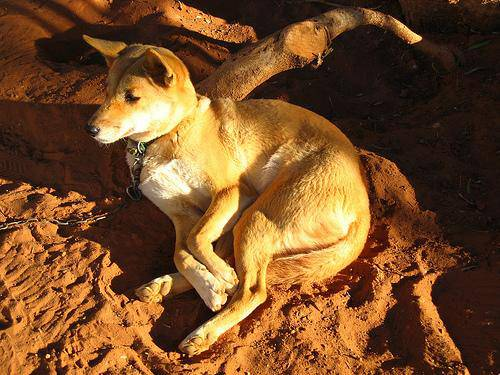

In [ ]:
from IPython.display import Image

Image('/content/drive/My Drive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# creating pathnames for image ID

filenames = [fname for fname in labels_csv['id']]

In [ ]:

filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
#assigning filename with path 
filenames = ["drive/My Drive/Dog-Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [ ]:
filenames[:10]

['drive/My Drive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Checking the whether the labeled data and training data is same

import os 

if len(os.listdir('drive/My Drive/Dog-Vision/train')) == len(filenames) :

  print("yes they match")
else :

  print('No there is some mismatch')


No there is some mismatch


In [ ]:
filenames[0:10]

['drive/My Drive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(os.listdir('drive/My Drive/Dog-Vision/train/'))

10238

In [ ]:
os.listdir('drive/My Drive/Dog-Vision/train')[:10]

['f6175a0ef289ef111b225a84240f2e4e.jpg',
 'f62f6d147bb05a257c05ffe418ae4e45.jpg',
 'f64d8dfc5544c9fb4bdc578a7756dfd7.jpg',
 'f5fa365252241c8be7b95d04444d5bed.jpg',
 'f62145318e69a5061563eca2eb806d6e.jpg',
 'f5dcfc042f10a6a57a54d42a4a1f2406.jpg',
 'f641553e92efc6824ca4b9cef837ba46.jpg',
 'f61517f58aa8a9d4248174bd75d891b1.jpg',
 'f5bc69deded716bae5e2134c81d9a606.jpg',
 'f5cef8edf2725dc143ead4774ddff74f.jpg']

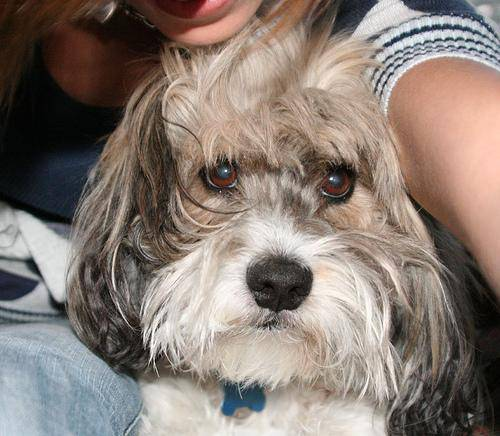

In [ ]:
Image(filenames[900])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [ ]:
#converting our lales in array by to_numpy()

import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
len(labels) == len(filenames)

True

In [ ]:
#finding unique labels

unique_breed = np.unique(labels)

unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breed)

120

In [ ]:
#Turning a single label into boolean array

print(labels[0])

labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#turning every label into boolean array

bool_labels = [label == unique_breed for label in labels]

bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(bool_labels)

10222

In [ ]:
print(labels[3])
print(bool_labels[3])
print(np.where(unique_breed==labels[3]))
print(bool_labels[3].argmax())
print(bool_labels[3].astype(int))

bluetick
[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
(array([15]),)
15
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [ ]:
#splitting data inot train and test set , but akggle has not provided the test set yet so creating validation set

X = filenames
y = bool_labels

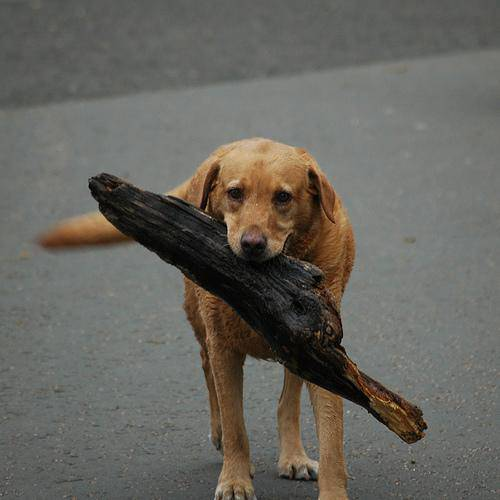

In [ ]:
Image('drive/My Drive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

In [ ]:
#taking few samples to build model a no time to comute all 10000 samples

NUM_IMAGES = 1000 #@param {type :'slider',min:1000,max:10000,step:1000}

In [ ]:
#splitting data

from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                     test_size=0.2,
                                                     random_state=42)

len(X_train ) , len(X_val) , len(y_train) , len(y_val)

(800, 200, 800, 200)

In [ ]:
#creating function to read image

from matplotlib.pyplot import imread

image = imread(filenames[42])

image.shape


(257, 350, 3)

In [ ]:
#coverting image into tensors

image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
#tensors

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
#creating a function to input image file and converting it into tensors and then normalizing it

IMG_SIZE = 224

def process_image(image_path) :

  """
  This function will preprocess the image into tensor and resize it
  
   """
  #taking input as image 

  image = tf.io.read_file(image_path)

  #decoding image into jpeg file

  image = tf.image.decode_jpeg(image,channels=3)

  #converting jpeg file into tensors numerical form

  image = tf.image.convert_image_dtype(image,tf.float32)

  #resizing the image

  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

Turning data into batches 

that is not more than 32 image per batch to effectively use the memory
creating a function to return a tuple

In [ ]:
#creating a function to return tuple('image',label)

def get_image_label(image_path,label) :

  image = process_image(image_path)

  return image,label  

In [ ]:
print(process_image(X[42]),tf.constant(y[42]))

tf.Tensor(
[[[0.3264178  0.5222886  0.3232816 ]
  [0.2537167  0.44366494 0.24117757]
  [0.25699762 0.4467087  0.23893751]
  ...
  [0.29325107 0.5189916  0.3215547 ]
  [0.29721776 0.52466875 0.33030328]
  [0.2948505  0.5223015  0.33406618]]

 [[0.25903144 0.4537807  0.27294815]
  [0.24375686 0.4407019  0.2554778 ]
  [0.2838985  0.47213382 0.28298813]
  ...
  [0.2785345  0.5027992  0.31004712]
  [0.28428748 0.5108719  0.32523635]
  [0.28821915 0.5148036  0.32916805]]

 [[0.20941195 0.40692952 0.25792548]
  [0.24045378 0.43900946 0.2868911 ]
  [0.29001117 0.47937486 0.32247734]
  ...
  [0.26074055 0.48414773 0.30125174]
  [0.27101526 0.49454468 0.32096273]
  [0.27939945 0.5029289  0.32934693]]

 ...

 [[0.00634795 0.03442048 0.0258106 ]
  [0.01408936 0.04459917 0.0301715 ]
  [0.01385712 0.04856448 0.02839671]
  ...
  [0.4220516  0.39761978 0.21622123]
  [0.47932503 0.45370543 0.2696505 ]
  [0.48181024 0.45828083 0.27004552]]

 [[0.00222061 0.02262166 0.03176915]
  [0.01008397 0.03669046 0

In [ ]:
#creating a function to turn our data into batches i.e test data , valid data , train data

BATCH_SIZE=32

def create_data_batches(X, y=None , size=BATCH_SIZE, valid_data=False,test_data=False) :
  
  """

  Creating batches of X and y 
  shuffling training set so that our model doesnt learn about it , not shuffling valid dataset  
  also accepting test data so to create batches """

  if test_data :
    print("Creating test data batches....")

    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only filepaths no labels as it is test data

    data_batch = data.map(process_image).batch(BATCH_SIZE) #creating batches of 32 each to work on model
    
    return data_batch

  elif valid_data :
    print("creating valid_dataset batches...")  

    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))  #filepath and labels both

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  else :

    print("creating traning data.....")    

    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    data = data.shuffle(buffer_size=len(X)) #shuffling data 

    data= data.map(get_image_label) #create a tuple of image and label and preprocessing image_path into image

    data_batch = data.batch(BATCH_SIZE) # batches of traning data

    return data_batch

In [ ]:
#creating data batches 

train_data = create_data_batches(X_train,y_train)
val_data  = create_data_batches(X_val,y_val,valid_data=True)


creating traning data.....
creating valid_dataset batches...


In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
image[3]

array([[ 51, 100,  70],
       [ 56, 105,  73],
       [ 65, 112,  80],
       ...,
       [ 69, 124,  82],
       [ 71, 126,  84],
       [ 72, 127,  85]], dtype=uint8)

Visualizing our data

In [ ]:
import matplotlib.pyplot as plt

#creating a function to view n number of images in visual form with labels 

def show_images(image,labels) :

  plt.figure(figsize=(15,15)) #setting a figure
  for i in range(25) :

    ax = plt.subplot(5,5,i+1) # creating subplots of 5 rows and 5 columns

    #display the image

    plt.imshow(image[i])

    #adding label as title to the image

    plt.title(unique_breed[labels[i].argmax()])




In [ ]:
unique_breed[bool_labels[3].argmax()]

'bluetick'

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
train_images , train_labels = next(train_data.as_numpy_iterator())

In [ ]:
len(train_images)

32

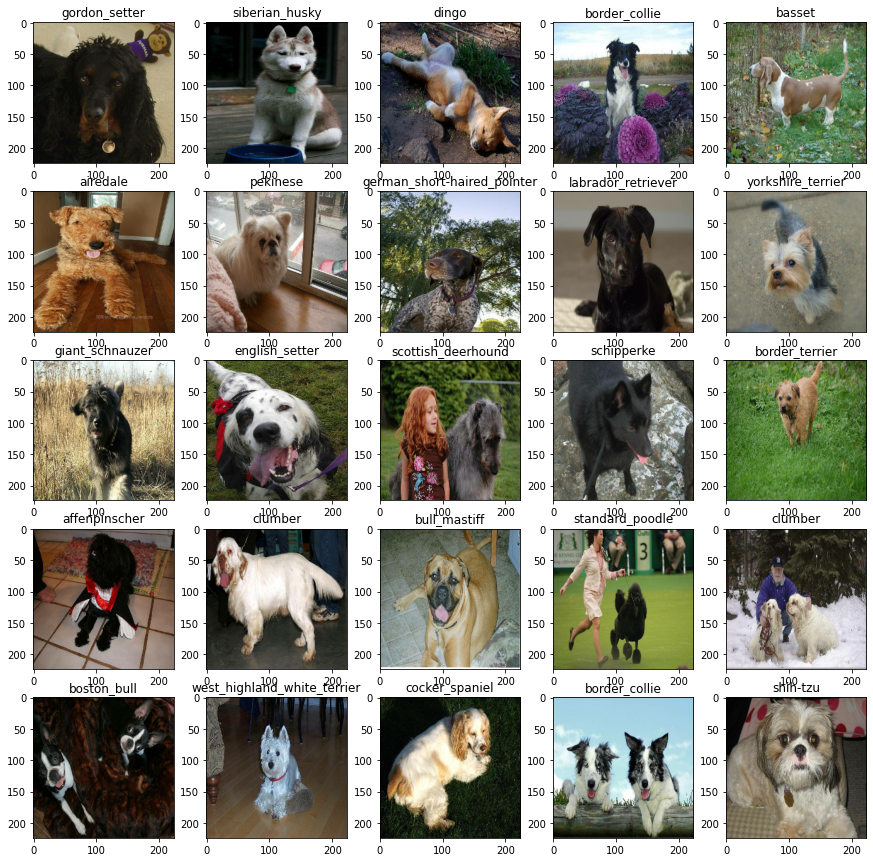

In [ ]:
#now the data has been unbatched  , now we can visualize using our function

show_images(train_images,train_labels)


Building a model usinf transfer learning
```
`# This is formatted as code`
```
tensorflow hub --https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
#setup input shapes to the model

INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

#setup output shape

OUTPUT_SHAPE = len(unique_breed)

#setup a model URL from tensorflow HUB

MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

In [ ]:
#settingup a model from tensorflow Hub

#creating a function to perform few steps on the model and build it

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL) :

  print('building a model',MODEL_URL)

  #setup the layers

  model = tf.keras.Sequential([
                  hub.KerasLayer(MODEL_URL),#input layer (layer 1)
                  tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                        activation='softmax')#output layer
                              ])
  
  #compile a model to evaluate

  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  #build a model

  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

building a model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


Settingup a callback function to track our model's traning process and stop if model is traning too much or models stop improving


# TensorBoard callback for tracking progress of our model




In [ ]:
import datetime
#load the tensorborad extension
%load_ext tensorboard

#creating a function to build tensorboard callback

def create_tensorboard_callback() :

  #creating a directoy for storing Tensorboard logs

  logdir = os.path.join('drive/My Drive/Dog-Vision/Logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')) #making logs whenver doing experiments

  return tf.keras.callbacks.TensorBoard(logdir)                      

## Early stopping callback helps us stop the model when evaluation metrics stops improving

In [ ]:
#early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

number of epocs is that , model will go to trian itself those number of times to find patterns

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider',min:10, max:100, step:10} 

In [ ]:
print('GPU','AVAILABLE' if tf.config.list_physical_devices('GPU') else 'NO')

GPU AVAILABLE


In [ ]:
#training a model with creating functions

def train_model() :

  #Crate a model
  model = create_model()

  #Create a new tensorboard sessions everytime we train a model
  tensorboard = create_tensorboard_callback()

  #fitting data 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,#number of times model is trained on training data
            validation_data=val_data,
            validation_freq=1,#number of times data should be tested on valid data per epoch
            callbacks=[tensorboard, early_stopping])
  
  #return the fitted model
  return model


In [ ]:
  #FIT THE MODEL

  model = train_model()

building a model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict(val_data,verbose=1)
predictions

In [ ]:
len(predictions)

**lets**  find the predcited value

In [ ]:
index = 42

print(f'max value (probability of prediction):{np.max(predictions[index])}')
print(f'sum of values:{np.sum(predictions[index])}')
print(f'index of max value :{np.argmax(predictions[index])}')
print(f'Name of Breed predicted : {unique_breed[np.argmax(predictions[index])]}')

In [ ]:
#turn probabalities into respective labels

def get_pred_label(predictions) :

  return unique_breed[np.argmax(predictions)]

In [ ]:
pred_label = get_pred_label(predictions[2])

In [ ]:
pred_label

In [ ]:
val_data

In [ ]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator() :

 images_.append(image)
 labels_.append(label)

images_[0] ,labels_[0]

In [ ]:
get_pred_label(labels_[0])

In [ ]:
get_pred_label(predictions[0])

In [ ]:
#creating function to unbatch the dataset

def unbatchify(data) :


  """turning batched dataset into separate arrays
  """

  images = []
  labels = []

  for image, label in val_data.unbatch().as_numpy_iterator() :

    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  
  return images,labels


In [ ]:
val_images , val_label = unbatchify(val_data)

Now we have 
** predicted values on val_images
** truth labels i.e val_labels
**val_images

In [ ]:
# defining a function to plot all data , that is predicted label , actual label and image


def plot_predictions(prediction_prob,truth_label,image,n=1) :

  pred_prob , truth_label , image = prediction_prob[n] , val_label[n] , val_images[n]

  pred_label = get_pred_label(pred_prob)

  #plotting the image

  plt.imshow(image)

  plt.xticks([])
  plt.yticks([])

  if pred_label == truth_label :
    color="green"
  else :
    color='red'  


  plt.title(f'{pred_label} , {np.argmax(pred_prob)},{ truth_label}', color=color)



In [ ]:
plot_predictions(prediction_prob = predictions,
                 truth_label=val_label,
                 image=val_images,
                 n=78)

In [ ]:
#visualized our model with predicted label and truth label

In [ ]:
#creating function to plot top 10 pred probablities

def plot_pred_conf(predictions_probabilities , labels , n=1) :

  pred_prob , truth_label = predictions_probabilities[n] , labels[n]

  pred_label = get_pred_label(pred_prob)


  #finding top 10 predic probabilities indes

  top_10_pred_index = pred_prob.argsort()[-10:][::-1]

  #findign top 10 predic values 
  top_10_pred_values = pred_prob[top_10_pred_index]

  #finding top 10 labels 
  top_10_pred_label = unique_breed[top_10_pred_index]

  #plotting the top 10 labels

  plot_top_10 = plt.bar(np.arange(len(top_10_pred_label)),
                        top_10_pred_values)
  
  plt.xticks(np.arange(len(top_10_pred_label)),
             labels = top_10_pred_label,
             rotation='vertical')
  
  #change color of the truth label

  if np.isin(truth_label, top_10_pred_label) :

    plot_top_10[np.argmax(top_10_pred_label == truth_label)].set_color('green')

  else :
    top_10_pred_label[] 


In [ ]:
plot_pred_conf(predictions_probabilities=predictions , 
               labels=val_label,
               n=9)

In [ ]:
plot_predictions(prediction_prob = predictions,
                 truth_label=val_label,
                 image=val_images,
                 n=9)      

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(val_label,get_pred_label(labels))

In [ ]:
len(predictions)

# saving and reloading a trianed model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Dog_Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


  

In [ ]:
# def load_model(model_path) :
#   """loads a model"""

#   print(f'loading the model from {model_path}')

#   model = tf.keras.models.load_model(model_path,
#                                      custom_objects={'Keraslayer':hub.KerasLayer})
  
#   return model  

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


In [ ]:
save_model(model,suffix='1000-images-mobilenetv2-Adam')

In [ ]:
loaded_dog_model_1000_images = load_model('drive/My Drive/Dog-Vision/models/20200712-07401594539615-1000-images-mobilenetv2-Adam.h5')

NameError: ignored

In [ ]:
cu

# Training data on full training dog dataset

In [ ]:
# full data that ius X and y


In [ ]:
full_data = create_data_batches(X,y)

In [ ]:
full_model = create_model()

In [ ]:
#creating model callbacks for our full data set

full_model_tensorboard = create_tensorboard_callback()

#no valid , cant monitor validation accuracy

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [ ]:
predictions

In [ ]:
custom_path = 'drive/My Drive/Dog-Vision/dog-photos/'

custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_path


['drive/My Drive/Dog-Vision/dog-photos/black labrador.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/german shepherd.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/index.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/gs2.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/bulldog.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/pomerian.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/pomerian1.jpg',
 'drive/My Drive/Dog-Vision/dog-photos/pug.jpg']

In [ ]:
custom_batch_data = create_data_batches(custom_image_path,test_data=True)

Creating test data batches....


In [ ]:
custom_batch_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
  model = tf.keras.models.load_model('drive/My Drive/Dog-Vision/models/20200712-07401594539615-1000-images-mobilenetv2-Adam.h5',
                                     custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
custom_preds = model.predict(custom_batch_data)

In [ ]:
custom_preds.shape

(8, 120)

In [ ]:
custom_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [ ]:
custom_labels  

['flat-coated_retriever',
 'german_shepherd',
 'labrador_retriever',
 'german_shepherd']

In [ ]:
custom_images =[]

for image in custom_batch_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
custom_images

[array([[[0.73657215, 0.85421926, 0.5718663 ],
         [0.7234419 , 0.841089  , 0.56010157],
         [0.71258754, 0.83023465, 0.5557248 ],
         ...,
         [0.8308649 , 0.8583159 , 0.5916492 ],
         [0.8371675 , 0.8710961 , 0.6076682 ],
         [0.83921576, 0.8745099 , 0.6117647 ]],
 
        [[0.7566702 , 0.8743172 , 0.5853291 ],
         [0.74724257, 0.8648897 , 0.57726705],
         [0.7381655 , 0.8558126 , 0.57466763],
         ...,
         [0.8441352 , 0.87865084, 0.6096293 ],
         [0.8504378 , 0.8860992 , 0.6220937 ],
         [0.849361  , 0.89090526, 0.62503505]],
 
        [[0.78656346, 0.89838064, 0.6052696 ],
         [0.77831745, 0.8901347 , 0.59737414],
         [0.7728172 , 0.88463444, 0.5935367 ],
         ...,
         [0.8556733 , 0.89608175, 0.6257856 ],
         [0.862106  , 0.90340525, 0.63688713],
         [0.857207  , 0.905719  , 0.6363649 ]],
 
        ...,
 
        [[0.9375763 , 0.8422523 , 0.71804607],
         [0.9490107 , 0.9020708 , 0.76687

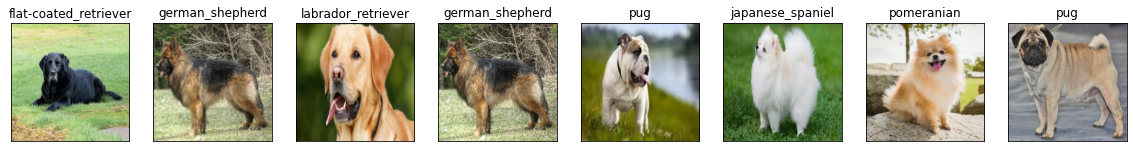

In [ ]:
plt.figure(figsize=(20,20))

for i , image in enumerate(custom_images):

  plt.subplot(1,len(custom_images),i+1)

  plt.xticks([])
  plt.yticks([])

  plt.title(custom_labels[i])

  plt.imshow(image)